<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/02_unsupervised_learning/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction in Machine Learning

High-dimensional data can be hard to visualize and may lead to overfitting. Dimensionality reduction techniques help simplify datasets by projecting them into lower dimensions while preserving their structure.

In this notebook, we will:
- Understand what dimensionality reduction is
- Apply PCA (Principal Component Analysis)
- Visualize data using PCA and t-SNE
- Explore when to use dimensionality reduction


### **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set(style="whitegrid")

### **Load High-Dimensional Dataset**

In [2]:
# Using the digits dataset (64 features)
digits = load_digits()
X = digits.data
y = digits.target

print("Shape of data:", X.shape)
print("Unique labels:", np.unique(y))

Shape of data: (1797, 64)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


### **Visualize a Few Digits**

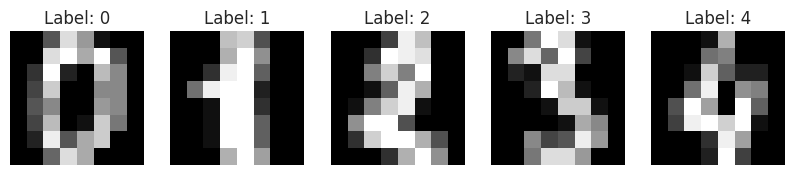

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')

### **Apply PCA for 2D Visualization**

Explained variance ratio: [0.14890594 0.13618771]


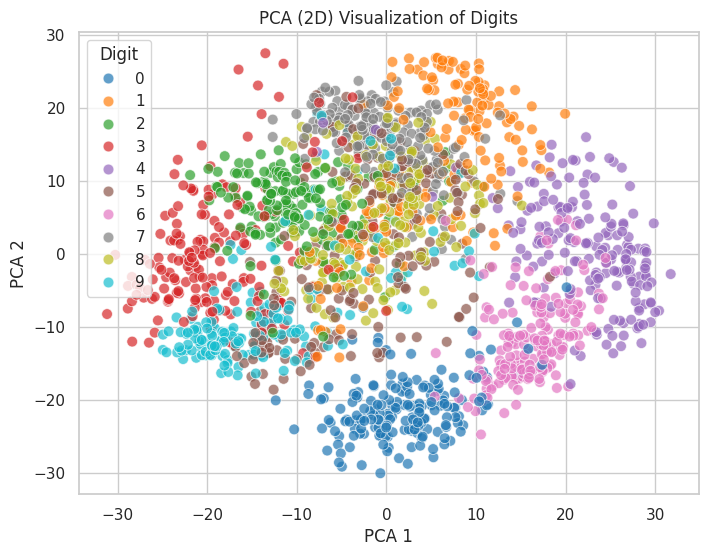

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10", s=60, alpha=0.7)
plt.title("PCA (2D) Visualization of Digits")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Digit")
plt.show()

### **Visualize Explained Variance**

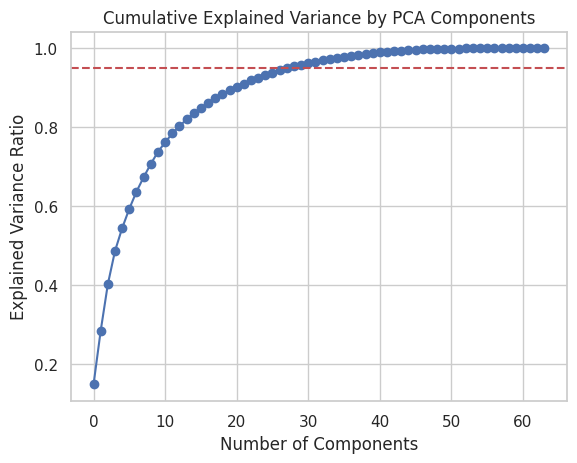

In [5]:
pca_full = PCA().fit(X)
explained = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(explained, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

### **t-SNE for Nonlinear Dimensionality Reduction**

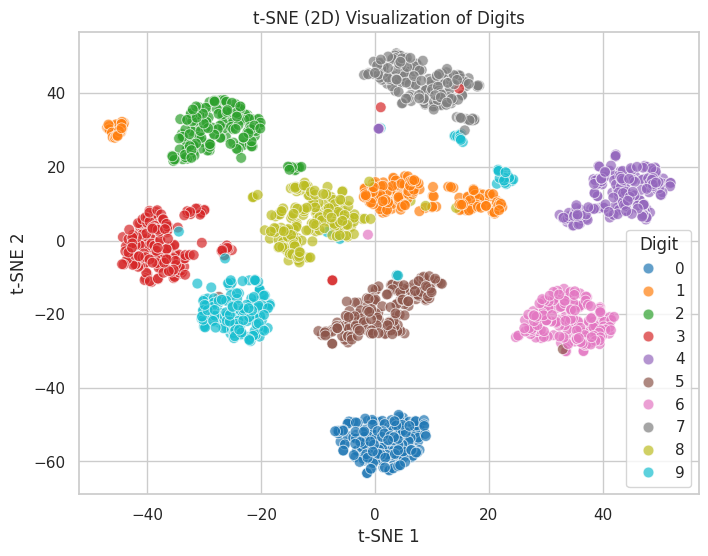

In [6]:
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="tab10", s=60, alpha=0.7)
plt.title("t-SNE (2D) Visualization of Digits")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Digit")
plt.show()

### **Use Cases of Dimensionality Reduction**
- Visualization of high-dimensional data
- Speeding up training and reducing overfitting
- Noise filtering and feature selection
- Preprocessing before clustering or classification


### **PCA vs. t-SNE: Key Differences**

| Technique | Linear/Nonlinear | Use Case | Pros | Cons |
|----------|------------------|----------|------|------|
| PCA | Linear | Speed & interpretation | Fast, interpretable | Misses non-linear patterns |
| t-SNE | Nonlinear | Visualization | Captures complex structure | Slower, non-deterministic |


### **Summary**
- PCA and t-SNE help us reduce dimensions while preserving structure.
- PCA is great for compression and speed.
- t-SNE is ideal for nonlinear visualization in 2D or 3D.

**Next:** Try `perceptron.ipynb` to learn more about Deep learning with NNs.


